<div class="alert alert-block alert-info">
    <h1>Wahrscheinlichkeitstheorie und Statistik</h1>
    <h2>WS 2020 / 2021</h2>
    <h2>Übung 3</h2>
    <h3>Allgemeine Informationen:</h3>
    <p>Schreiben Sie Ihre Antwort an die Stelle <i>YOUR ANSWER HERE</i>.</p>
    <p>Wenn Sie eine Zelle bearbeiten, löschen Sie die Zeile <i>raise NotImplementedError()</i>.</p>
    <p>Fügen Sie keine neuen Zellen hinzu oder löschen Zellen.</p>
    <h3>Abgabetermin</h3>
    <p>Die Abgabe der Hausaufgabe ist immer Dienstags um <strong>12:00 Uhr mittags</strong>! Vergessen Sie nicht Ihre Übung abzugeben.</p>
    <h2>Viel Erfolg!</h2>   
</div>

<div class="alert alert-block alert-warning">
    <h2>Hinweise zur Bearbeitung der Übung</h2>
    <h3>Angabe von Ergebnissen</h3>
    <ul>
        <li>Sie müssen nicht runden. Wir testen ob Ihr Ergebnis um maximal $1\%$ vom exaktem Wert abweicht. $f_{rel }= \frac{|x_{exakt} - x_{Studi}|}{x_{exakt}} \leq 0.01$</li>
        <li>Prozentzahlen werden immer als Zahl zwischen 0 und 1 angegeben. 30% wird somit als 0.3 angegeben.</li>
        <li>Fließkommazahlen werden mit einem Dezimalpunkt angegeben, nicht mit einem Komma. $\frac{1}{4} \rightarrow 0.25$.</li>
    </ul>
    <h3>Programmcode</h3>
    <ul>
        <li>Benutzen Sie nur die in der nächsten Zelle angegebenen Bibliotheken mit den dort benutzten Namen. Wenn Sie also etwas aus der Bibliothek <i>random</i> nutzen wollen, verwenden Sie den Namen <i>rd</i>.</li>
        <li>Das Ergebnis einer Funktion muss mittels <i>return</i> zurückgegeben werden. Ein <i>print</i> Statement ist keine gültige Rückgabe.</li>
        <li>Stellen Sie sicher, dass sich Ihr Code ausführen lässt. Code der nicht läuft kann nicht automatisch bewertet werden.</li>
        <li><strong>Bevor Sie abgeben:</strong> Klicken Sie im Menü auf Kernel > Restart & Run All. Damit führen Sie das Notebook von oben nach unten aus. Alle Fehler die dann auftreten, treten auch beim Bewerten auf.</li>
        <li>Entfernen Sie die Zeilen <i>raise NotImplementedError()</i> wenn Sie eine Aufgabe bearbeiten. Ansonsten wird beim Bewerten eine Exception ausgelöst die uns sagt, dass Sie die Aufgabe nicht bearbeitet haben!</li>
    </ul>
    <h3>Plots</h3>
    <ul>
        <li>Jeder Plot soll eine Achsenbeschriftung, einen Titel, eine Legende und ein Grid haben.</li>
    </ul>
    
</div>

In [17]:
import math
import collections
import itertools        
import glob
import numpy as np
import random as rd
import pandas as pd        
import matplotlib.pyplot as plt
from scipy import stats


# Body Mass Index [10 Punkte]

Gegeben sind die Größe und das Gewicht aus einer Gesundheitsumfrage unter Jugendlichen und jungen Erwachsenen aus den USA (https://www.icpsr.umich.edu/icpsrweb/DSDR/studies/21600).

In der nächsten Zelle werden die Daten in zwei numpy arrays mit den Namen ```gewicht``` und ```groesse``` eingelesen.

In [54]:
import pickle

with open('data/gewicht.pkl', 'rb') as f:
    gewicht = pickle.loads(f.read())
    
with open('data/groesse.pkl', 'rb') as f:
    groesse = pickle.loads(f.read())

## Body Mass Index a) [5 Punkte]

Berechnen Sie die Varianzen für das Gewicht, die Größe und den Body Mass Index.

Der Body Mass Index ist definiert als $\textrm{BMI} = \frac{\textrm{Gewicht}}{\textrm{Größe}^2}$

Speichern Sie die Varianzen in den Variablen ```var_gewicht```, ```var_groesse``` und ```var_bmi```.

Als zweites nehmen Sie die Varianzen für die Größe und das Gewicht und berechnen den BMI der Varianzen. Speichern Sie diesen Wert in der Variablen ```var_kombiniert```.

In [104]:
import numpy as np

x = list(zip(groesse,gewicht))

x = [(h,w) for h,w in x if w <= 250 and w>=10 and h>=10 and h<=250]


gewicht2 = np.array([w for h,w in x])
groesse2 = np.array([h/100 for h,w in x])

var_gewicht = np.var(gewicht2)
var_groesse = np.var(groesse2*100)

var_bmi = np.var(gewicht2/((groesse2)**2))
var_kombiniert = var_gewicht/((var_groesse)**2)

# YOUR CODE HERE
#raise NotImplementedError()
print(f'Die Varianz des Gewichts ist {var_gewicht:.2f}')
print(f'Die Varianz der Größe ist {var_groesse:.2f}')
print(f'Die Varianz des BMI ist {var_bmi:.4e}')
print(f'Der BMI der Varianzen ist {var_kombiniert:.4e}')

Die Varianz des Gewichts ist 536.30
Die Varianz der Größe ist 99.35
Die Varianz des BMI ist 5.6061e+01
Der BMI der Varianzen ist 5.4338e-02


## Body Mass Index b) [5 Punkte]

Vergleichen Sie die Varianz des BMI (```var_bmi```) mit dem BMI der Varianzen (```var_kombiniert```). 

Lässt sich die Varianz des BMI mit dem BMI der Varianzen berechnen? Warum oder warum nicht?

Nein da zwei völlig unterschiedliche Werte rauskommen

# Ähnlichkeit der Binomialverteilung [30 Punkte]

Aus der Vorlesung wissen wir, dass der Erwartungswert einer Binomialverteilung wie folgt definiert ist:

$E[X] = n*p$

Wir wollen nun verschiedene Binomialverteilungen mit dem selben Erwartungswert $E[X] = 5$ betrachten. 

Dafür betrachten wir folgende Werte für $n$:

$n = \begin{bmatrix}10 & 20 & 50 & 100 & 200 & 500 \end{bmatrix}$

Daraus ergeben sich die Parameter für sechs verschiedene Binomialfunktionen (Zähldichte, pmf).

Vergleichen Sie diese Funktionen für die ersten 11 $k$-Werte:

$k = \begin{bmatrix}0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \end{bmatrix}$

Ziel ist es zu zeigen, dass alle diese Funktionen sehr ähnlich sind und letztendlich gegen die Poissonverteilung konvergieren.

## Ähnlichkeit a) [10 Punkte]

Zunächst wollen wir eine Funktion erstellen, die für einen gegebenen Erwartungswert, eine Liste für $n$ und eine Liste für $k$ eine Tabelle für die verschiedenen Binomialverteilungen erstellt.

Dabei entsprechen die Zeilen der Tabelle den Werten für $n$ und die Spalten den Werten für $k$.

Der Rückgabewert der Funktion soll eine ```numpy``` Matrix sein.

*Hinweis:*

In numpy erstellen Sie eine leere Matrix aus Nullen mit $z$ Zeilen und $s$ Spalten mit dem Befehl ```np.zeros((z, s))```

**Achtung:** Die Funktion soll mit unterschiedlichen Erwartungswerten funktionieren. Nutzen Sie nur die Parameter die der Funktion übergeben werden.

In [13]:
import numpy as np
import scipy.stats as stats

def binomTabelle(erwartungswert: float, n_range: [int], k_range:[int]) -> np.matrix:
    '''
    Erstelle eine Tabelle für verschiedene Binomialverteilungen mit dem selben
    Erwartungswert
    
    Args:
        erwartungswert -- Der Erwartungswert der Binomialverteilungen
        n_range        -- Eine Liste mit den verschiedenen Werte für n, bspw. [10, 20, 50, ...]
        k_range        -- Eine Liste mit den verschiedenen Werte für k, bspw. [0, 1, 2, ...] 
    Returns:
        tabelle        -- Eine numpy Matrix mit den Werten der Binomialverteilungen
    '''
    nl = len(n_range)
    nk = len(k_range)
    tabelle = np.zeros((nl, nk))
    for i in range(nl):
        for j in range(nk):
            x = (i,j)
            temp = stats.binom.pmf(n = n_range[i],k=k_range[j],p=erwartungswert/n_range[i])
            tabelle.itemset(x,temp)
    # YOUR CODE HERE
    # raise NotImplementedError()
    return tabelle
            

print(binomTabelle(
    erwartungswert=5, 
    n_range=[10, 20, 50, 100, 200, 500], 
    k_range=range(11)))

[[0.00097656 0.00976563 0.04394531 0.1171875  0.20507813 0.24609375
  0.20507813 0.1171875  0.04394531 0.00976563 0.00097656]
 [0.00317121 0.02114141 0.06694781 0.13389562 0.18968545 0.20233115
  0.16860929 0.1124062  0.06088669 0.02706075 0.00992228]
 [0.00515378 0.02863208 0.0779429  0.13856515 0.1809045  0.1849246
  0.15410383 0.10762807 0.06427788 0.03332927 0.01518333]
 [0.00592053 0.03116068 0.08118177 0.13957568 0.17814264 0.18001783
  0.15001486 0.10602554 0.06487089 0.0349013  0.01671588]
 [0.006323   0.03242564 0.08272695 0.13999945 0.17679418 0.17770081
  0.14808401 0.10523186 0.06509535 0.03560771 0.01743865]
 [0.00657048 0.03318426 0.08363103 0.14022981 0.1759955  0.17635105
  0.1469592  0.1047588  0.06520971 0.03600805 0.01785854]]


## Ähnlichkeit b) [10 Punkte]

Plotten Sie die Tabelle mit $k$ auf der x-Achse und $B(n,k,p)$ auf der y-Achse.

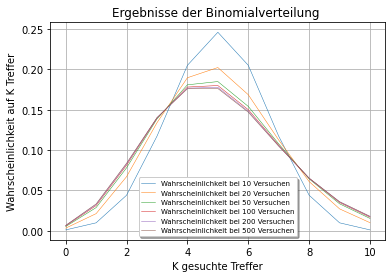

In [106]:
import matplotlib.pyplot as plt
narr = [10, 20, 50, 100, 200, 500]
tabelle = binomTabelle(erwartungswert=5, n_range=narr, k_range=range(11))
for i in range(len(tabelle)):
    plt.plot(range(11), tabelle[i], linewidth=0.5, linestyle='solid',label='Wahrscheinlichkeit bei '+str(narr[i])+' Versuchen')
    
legend = plt.legend(loc='lower center', shadow=True, fontsize='x-small')
plt.xlabel('K gesuchte Treffer')
plt.ylabel('Wahrscheinlichkeit auf K Treffer')
plt.grid(True)
plt.title("Ergebnisse der Binomialverteilung ")
plt.show()
# YOUR CODE HERE
#raise NotImplementedError()

## Ähnlichkeit c) [10 Punkte]

Plotten Sie nun die zugehörige Poissonverteilung zusammen mit der Binomialverteilung an der Stelle $n=500$.

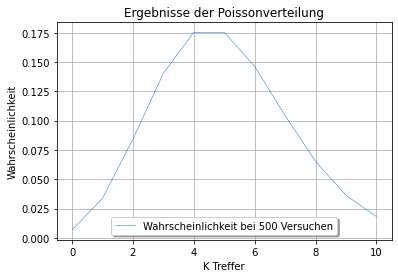

In [51]:
# YOUR CODE HERE
#raise NotImplementedError()
poival = []
for i in range(11):
    poival.append((5**i) * (math.exp(1)**(-5)) / (math.factorial(i)))

plt.plot(range(11), poival, linewidth=0.5, linestyle='solid',label='Wahrscheinlichkeit bei 500 Versuchen')

plt.legend(loc='lower center', shadow=True, )
plt.xlabel('K Treffer')
plt.ylabel('Wahrscheinlichkeit')
plt.grid(True)
plt.title("Ergebnisse der Poissonverteilung")
plt.show()


# Urnen [30 Punkte]

Gegeben sei eine Urne mit verschiedenfarbigen Kugeln.

Sie ziehen Kugeln ohne Zurücklegen aus der Urne.

Der Einfachheit halber stellen wir Ihnen eine Implementierung einer Urne zur Verfügung. <br>In der nächsten Zelle finden Sie Beispiele wie die Urne benutzt wird.

In [37]:
from data import Urne            

# Erstelle eine Urne mit drei roten und einer grünen Kugel
urne = Urne({
    'rot': 3,
    'grün': 1
})

# Zustand der Urne anzeigen
print(urne)

# Eine Kugel aus der Urne ziehen
kugel = urne.zieheKugel()
print(f'Wir haben eine Kugel der Farbe {kugel} gezogen!')

# Zustand nochmal anzeigen
print(urne)

# Zeige an wieviele Objekte in der Urne sind

print(f'Es befinden sich noch {len(urne)} Kugeln in der Urne.')

Die Urne enthält: ['rot', 'rot', 'rot', 'grün']
Wir haben eine Kugel der Farbe grün gezogen!
Die Urne enthält: ['rot', 'rot', 'rot']
Es befinden sich noch 3 Kugeln in der Urne.


### Urnen a) [15 Punkte]

Angenommen wir haben eine Urne mit zwei oder mehr roten Kugeln und andersfarbige Kugeln. Nun wollen wir wissen, wie oft wir im Mittel aus der Urne ziehen müssen, bis wir genau zwei rote Kugeln gezogen haben.

Der Einfachheit halber wollen wir den Erwartungswert für die Anzahl der Züge nicht analytisch berechnen, sondern simulieren.

Dafür erstellen wir $1000$ Mal eine neue Urne, ziehen solange bis wir zwei rote Kugeln haben und merken uns die Anzahl der Züge. Am Ende berechnen wir den angenäherten Erwartungswert aus dem Ergebnis des Experiments.

*Beispiel:*

Sie haben acht rote, drei blaue und vier grüne Kugeln.

Nun ziehen Sie bis Sie zwei rote Kugeln gezogen haben. Sie führen das Experiment $n = 3$ mal durch um den Erwartungswert zu approximieren.

```blau, grün, rot, blau, rot``` -> 5 Züge

```rot, rot``` -> 2 Züge

```rot, grün, rot``` -> 3 Züge

Dann ist der näherungsweise bestimme Erwartungswert $\frac{5 + 2 + 3}{3} = 3 \frac{1}{3}$

In [59]:
from data import Urne            
            
def erwartungsWertZuege(farben: {str, int}, n_experimente) -> float:
    '''
    Approximiere den Erwartungswert für die Anzahl an Zügen
    bis zwei rote Kugeln gezogen wurden.
    
    Args:
        farben         -- ein dictionary mit farben als keys und anzahl als value
        n_experimente  -- wie oft wir das Experiment wiederholen
    Returns:
        erwartungswert -- wie oft wir ziehen müssen um genau zwei rote Kugeln zu erhalten
    '''
    erwartungswert = 0
    urne = Urne(farben)
    for i in range(n_experimente):
        urne = Urne(farben)
        x = 0
        while x<2:
            if urne.zieheKugel() == 'rot':
                x+=1
            erwartungswert+=1
    erwartungswert = erwartungswert/n_experimente
        
        
    # YOUR CODE HERE
    #raise NotImplementedError()
    return erwartungswert

erwartungsWertZuege(
    farben={'rot': 6, 'grün': 3, 'gelb': 7}, 
    n_experimente=10000
)

4.8712

### Urnen b) [15 Punkte]

Im zweiten Teil der Aufgabe legen wir die Anzahl der Züge die wir machen auf $5$ fest.

Nun wollen wir wissen wie hoch der Erwartungswert für die Anzahl an verschiedenen Farben ist.

*Beispiel:*

Sie haben acht rote, drei blaue und vier grüne Kugeln und ziehen jeweils 5 Kugeln.

Sie führen das Experiment $n = 3$ mal durch um den Erwartungswert zu approximieren.

```blau, grün, rot, blau, rot``` -> 3 Farben

```rot, rot, rot, rot, grün``` -> 2 Farben

```grün, blau, blau, grün, grün``` -> 1 Farbe

Dann ist der näherungsweise bestimme Erwartungswert $\frac{3 + 2 + 1}{3} = 2$

In [58]:
from data import Urne            
            
def erwartungsWertFarben(farben: {str, int}, n_experimente: int, n_zuege: int=10) -> float:
    '''
    Approximiere den Erwartungswert für die Anzahl an Farben nach n Zügen
    
    Args:
        farben         -- ein dictionary mit farben als keys und anzahl als value
        n_zuege        -- Anzahl der Kugeln die wir in jedem Durchlauf ziehen
        n_experimente  -- wie oft wir das Experiment wiederholen
    Returns:
        erwartungswert -- wieviele Farben wir im Durchschnitt nach n Zügen 
    '''
    erwartungswert = 0
    # YOUR CODE HERE
    # raise NotImplementedError()
    for i in range(n_experimente):
        urne = Urne(farben)
        farbenliste = []
        for i in range(n_zuege):
            farbenliste.append(urne.zieheKugel())
        farbenliste = list(set(farbenliste)) # BITTE HIER IRGENDWAS ANDERES CODEN UM DAS DISTINCT ZU BEKOMMEN DAS IST ZU DUMM
        erwartungswert+=len(farbenliste)
        
            
    return erwartungswert/ n_experimente

erwartungsWertFarben(
    farben={'rot': 16, 'grün': 18, 'gelb': 17, 'lila': 16, 'schwarz': 9}, 
    n_experimente=10000,
    n_zuege=5
)

3.3694


# Roboter [30 Punkte]

Sie haben mit einem Team ein Objekterkennungssystem für einen Roboter gebaut. 

Der Roboter kann folgende Objekte erkennen:

- Kaffeetassen
- Löffel
- Gläser
- Schüsseln
- Teller

Sie haben die Objekterkennung mit den fünf Objekten getestet und folgende Genauigkeiten ermittelt:

| Objekt      | Genauigkeit |
|-------------|-------------|
| Kaffeetasse | $98\%$      |
| Löffel      | $95\%$      |
| Glas        | $93\%$      |
| Schüssel    | $97\%$      |
| Teller      | $91\%$      |

Dies bedeutet wenn Sie dem Roboter 100 Kaffeetassen zeigen, erkennt der Roboter nur 98 der Kaffeetassen richtig als Kaffeetassen.

Nun kommen Sie ins Labor und finden folgende Notiz Ihrer Kollegin:

*Der Roboter wurde in Raum **A** eingesetzt und hat ein Objekt falsch klassifiziert*.

Sie wissen allerdings nicht welches Objekt falsch erkannt wurde. Dafür kennen Sie den Anteil der verschiedenen Objekte in Raum **A**:

| Objekt      | Anteil in Raum A |
|-------------|------------------|
| Kaffeetasse | $30\%$           |
| Löffel      | $25\%$           |
| Glas        | $15\%$           |
| Schüssel    | $20\%$           |
| Teller      | $10\%$           |


Die Frage ist nun, wie hoch die Wahrscheinlichkeit ist, dass das falsch erkannte Objekt eine Kaffeetasse, ein Löffel, ein Glas, eine Schüssel oder ein Teller ist.

## Roboter a) [20 Punkte]

Vervollständigen Sie die Funktion ```falschErkannt```.

Diese erhält zwei Dictionaries:

- ```genauigkeiten``` $\rightarrow$ Genauigkeit für jedes Objekt in Prozent. Keys sind Namen der Objekte, Values sind die Genauigkeiten (bswp. ```genauigkeiten['Kaffeetasse'] = 0.98```, also $98\%$ der Kaffeetassen werden richtig als Kaffeetassen erkannt)

- ```raum``` $\rightarrow$ Verteilung der Objekte im Raum. Keys sind Namen der Objekte, Values sind die Anteile der Objekte im Raum (bspw. ```raum['Kaffeetasse'] = 0.3```, also $30\%$ der Objekte sind Kaffeetassen)

Als Ergebnis wollen wir wieder ein Dictionary welches angibt mit welcher Wahrscheinlichkeit ein falsch erkanntes Objekt eine Kaffeetasse, ein Glas, etc ist.

In [74]:
import numpy as np

def falschErkannt(genauigkeiten: {str, float}, raum: {str, float}) -> {str, float}:
    '''
    Berechne die Wahrscheinlichkeit dafür, dass ein falsch erkanntes Objekt 
    ein bestimmtes Objekt ist
    
    Args:
        genauigkeiten -- Dictionary mit den Genauigkeiten für jedes Objekt
        raum          -- Dictionary mit den Anteilen für jedes Objekt im Raum
    Returns:
        fehlerkennung -- Dictionary mit den Wahrscheinlichkeiten einer Fehlerkennung für jedes Objekt
    '''
    gesamt = 0
    dictio = {}
    for objekt in genauigkeiten:
        temp = raum[objekt] * (1 - genauigkeiten[objekt])
        gesamt += temp
        
        
    for objekt in genauigkeiten:
        temp = raum[objekt] * (1 - genauigkeiten[objekt])
        dictio.update({objekt : temp/gesamt})
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    return dictio

# Aufruf der Funktion mit oben beschriebenen Werten
genauigkeiten = {
    'Kaffeetasse': 0.99,
    'Löffel': 0.95,
    'Glas': 0.93,
    'Schüssel': 0.97,
    'Teller': 0.91
}

raumA = {
    'Kaffeetasse': 0.30,
    'Löffel': 0.25,
    'Glas': 0.15,
    'Schüssel': 0.2,
    'Teller': 0.1
}

fehlerkennung = falschErkannt(genauigkeiten, raumA)

# Test auf richtiges return Format
assert type(fehlerkennung) == dict, 'Sie müssen ein Dictionary zurückgeben!'

# Ausgabe der Wahrscheinlichkeiten
for objekt in fehlerkennung:
    print(f'Mit einer Wahrscheinlichkeit von {fehlerkennung[objekt]:.4f} ist das falsch erkannte Objekt ein(e) {objekt}.')

Mit einer Wahrscheinlichkeit von 0.0732 ist das falsch erkannte Objekt ein(e) Kaffeetasse.
Mit einer Wahrscheinlichkeit von 0.3049 ist das falsch erkannte Objekt ein(e) Löffel.
Mit einer Wahrscheinlichkeit von 0.2561 ist das falsch erkannte Objekt ein(e) Glas.
Mit einer Wahrscheinlichkeit von 0.1463 ist das falsch erkannte Objekt ein(e) Schüssel.
Mit einer Wahrscheinlichkeit von 0.2195 ist das falsch erkannte Objekt ein(e) Teller.


## Roboter b) [10 Punkte]

Als nächstes möchten wir die Wahrscheinlichkeiten in einem Säulendiagramm darstellen. 

Nehmen Sie dafür einmal die Fehlerwahrscheinlichkeiten die sich im oben beschriebenen Raum A ergeben und einmal die Fehlerwahrscheinlichkeiten für folgenden Raum B:

| Objekt      | Anteil in Raum B |
|-------------|------------------|
| Kaffeetasse | $15\%$           |
| Löffel      | $13\%$           |
| Glas        | $30\%$           |
| Schüssel    | $22\%$           |
| Teller      | $20\%$           |

Stellen Sie die Wahrscheinlichkeiten für beide Räume im selben Diagramm dar. Für jedes Objekt benötigen Sie zwei Säulen. Falls Sie nicht wissen, wie Sie ein solches Diagramm erstellen können Sie bswp. [hier](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py) nachschauen.

[0.07317073170731712, 0.304878048780488, 0.2560975609756095, 0.14634146341463425, 0.2195121951219511]


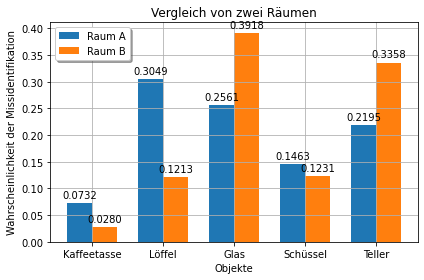

In [103]:
import matplotlib.pyplot as plt
# YOUR CODE HERE

genauigkeiten = {
    'Kaffeetasse': 0.99,
    'Löffel': 0.95,
    'Glas': 0.93,
    'Schüssel': 0.97,
    'Teller': 0.91
}

raumA = {
    'Kaffeetasse': 0.30,
    'Löffel': 0.25,
    'Glas': 0.15,
    'Schüssel': 0.2,
    'Teller': 0.1
}

raumB = {
    'Kaffeetasse': 0.15,
    'Löffel': 0.13,
    'Glas': 0.30,
    'Schüssel': 0.22,
    'Teller': 0.2
}
wRaumA = falschErkannt(genauigkeiten,raumA)
wRaumB = falschErkannt(genauigkeiten,raumB)
labels = genauigkeiten.keys()
print([item for item in wRaumA.values()])
men_means = [item for item in wRaumA.values()]
women_means = [item for item in wRaumB.values()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Raum A')
rects2 = ax.bar(x + width/2, women_means, width, label='Raum B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Wahrscheinlichkeit der Missidentifikation')
ax.set_xlabel('Objekte')
ax.set_title('Vergleich von zwei Räumen')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.grid()
ax.legend(loc='upper left', shadow=True)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()